Scope:

This branch should implement torch functionality in expsolve. 

Once investigations are done, the derivative part needs to go in fourier and splittings, for e.g., to make torch compatible derivatives, and this file should be deleted. 

Torch compatible applications should be in their own specific branches and not included here. 

In [1]:
import numpy as np
import scipy as sp
import expsolve as es
import torch
import matplotlib.pyplot as plt

In [2]:
a = 2.
n = 100

xr = es.fourier.fixrange([-a,a],1)
LS = es.fourier.laplaciansymbol([n], xr)

In [9]:
x = es.fourier.grid1d(n, [-a,a])
u0 = np.exp(np.sin(np.pi * x))

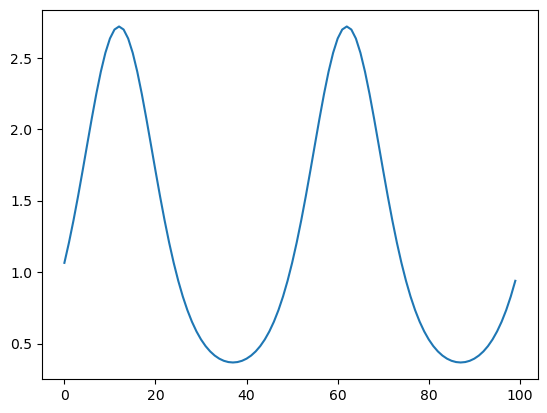

In [10]:
plt.plot(np.abs(u0))
plt.show()

In [11]:
h = 0.1
uL = es.fourier.laplacianopexp(LS, h*1j, u0)

In [13]:
uD = es.fourier.diffopexp(0, 2, h*1j, u0, xr)

In [15]:
np.linalg.norm(uD-uL)

4.5261299145163384e-15

In [8]:
def tcfft(f):
    return torch.fft.fftshift(torch.fft.fftn(f))

def tcifft(f):
    return torch.fft.ifftn(torch.fft.ifftshift(f))

In [9]:
def tlaplacianopexp(lapsymb, s, u):
    esL = torch.exp(s * lapsymb)   # in practical implementation better to compute and store this once.
    return tcifft(esL * tcfft(u))

In [10]:
tLS = torch.tensor(np.real(LS))

In [11]:
tu0 = torch.tensor(u0)

In [12]:
1.0j*tu0

tensor([0.+1.0648j, 0.+1.2061j, 0.+1.3621j, 0.+1.5308j, 0.+1.7089j, 0.+1.8916j, 0.+2.0729j,
        0.+2.2457j, 0.+2.4020j, 0.+2.5339j, 0.+2.6342j, 0.+2.6969j, 0.+2.7183j, 0.+2.6969j,
        0.+2.6342j, 0.+2.5339j, 0.+2.4020j, 0.+2.2457j, 0.+2.0729j, 0.+1.8916j, 0.+1.7089j,
        0.+1.5308j, 0.+1.3621j, 0.+1.2061j, 0.+1.0648j, 0.+0.9391j, 0.+0.8291j, 0.+0.7342j,
        0.+0.6533j, 0.+0.5852j, 0.+0.5287j, 0.+0.4824j, 0.+0.4453j, 0.+0.4163j, 0.+0.3946j,
        0.+0.3796j, 0.+0.3708j, 0.+0.3679j, 0.+0.3708j, 0.+0.3796j, 0.+0.3946j, 0.+0.4163j,
        0.+0.4453j, 0.+0.4824j, 0.+0.5287j, 0.+0.5852j, 0.+0.6533j, 0.+0.7342j, 0.+0.8291j,
        0.+0.9391j, 0.+1.0648j, 0.+1.2061j, 0.+1.3621j, 0.+1.5308j, 0.+1.7089j, 0.+1.8916j,
        0.+2.0729j, 0.+2.2457j, 0.+2.4020j, 0.+2.5339j, 0.+2.6342j, 0.+2.6969j, 0.+2.7183j,
        0.+2.6969j, 0.+2.6342j, 0.+2.5339j, 0.+2.4020j, 0.+2.2457j, 0.+2.0729j, 0.+1.8916j,
        0.+1.7089j, 0.+1.5308j, 0.+1.3621j, 0.+1.2061j, 0.+1.0648j, 0.+0.9391j, 

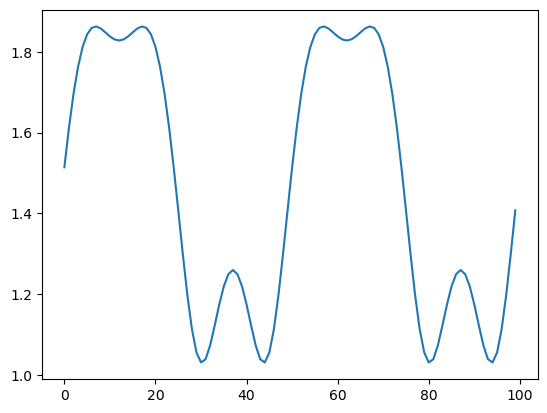

In [21]:
tuL = tlaplacianopexp(tLS, h*1j, tu0)
plt.plot(np.abs(tuL))
plt.show()

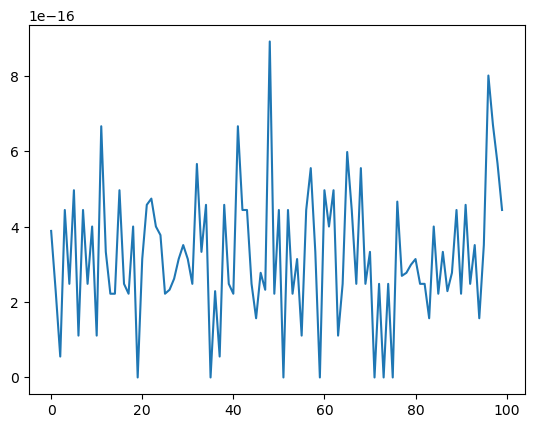

In [27]:

plt.plot(np.abs(uL-tuL.numpy()))
plt.show()

In [32]:
np.linalg.norm(torch.tensor(uL)-tuL)

3.647095111623327e-15

In [37]:
xrange = [0, 2*np.pi]
n = 100
[x,y] = es.fourier.grid([n,n], xrange)
s = np.sin(x)
s = torch.tensor(s)

In [38]:
es.fourier.dim(s)

2

In [15]:
x = torch.randn(2,2, dtype=torch.cfloat)
x

tensor([[-0.4883-0.3846j, -0.9750-0.5000j],
        [ 0.7392-0.3131j,  1.0942-0.8622j]])

In [16]:
torch. __version__

'1.13.1'